<a href="https://colab.research.google.com/github/Diyasojan24/AI-Ml/blob/main/model_building(heart_disease).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv('heart_disease.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# checking duplicate rows #

duplicate_rows=data[data.duplicated()]
print(duplicate_rows.sum())

age          39360.0
sex            507.0
cp             675.0
trestbps     95158.0
chol        177707.0
fbs            108.0
restecg        384.0
thalach     107672.0
exang          246.0
oldpeak        783.3
slope          998.0
ca             556.0
thal          1683.0
target         362.0
dtype: float64


In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
num_df=data.select_dtypes(include="number")

In [ ]:
print("numerical columns are")
num_cols=num_df.columns.tolist()
print(num_cols)
print (" ")

numerical columns are
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
 


In [ ]:
## filling values for numerical columns ##


for col in num_cols:
  num_df[col]=num_df[col].fillna(num_df[col].median())

In [ ]:
num_df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


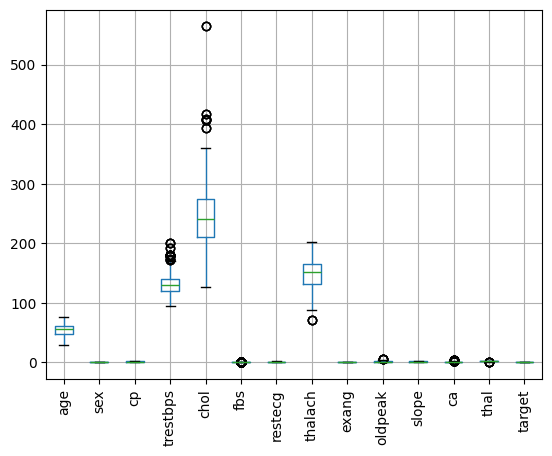

In [ ]:
num_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
## outlier detection and removal ##

def remove_outliers(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  df[column_name]=df[column_name].clip(upper=upper_bound)
  df[column_name]=df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col]= remove_outliers(num_df, col)

In [ ]:
# scaling numerical columns #

from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
num_df_scaled=pd.DataFrame(Scalar.fit_transform(num_df),\
                           columns=num_df.columns)
num_df=num_df_scaled
print("numerical dataframe after scaling:")
num_df.head()

numerical dataframe after scaling:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.824084,-0.712287,-0.054537,0.995433,1.467285,1.104886,-1.026698
1,-0.158157,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.255654,1.403928,1.785457,-2.243675,-0.779958,1.104886,-1.026698
2,1.716595,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.056105,1.403928,1.347363,-2.243675,-0.779958,1.104886,-1.026698
3,0.724079,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.518006,-0.712287,-0.930725,0.995433,0.343664,1.104886,-1.026698
4,0.834359,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.886886,-0.712287,0.734031,-0.624121,2.029096,-0.537621,-1.026698


In [ ]:
num_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.824084,-0.712287,-0.054537,0.995433,1.467285,1.104886,-1.026698
1,-0.158157,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.255654,1.403928,1.785457,-2.243675,-0.779958,1.104886,-1.026698
2,1.716595,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.056105,1.403928,1.347363,-2.243675,-0.779958,1.104886,-1.026698
3,0.724079,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.518006,-0.712287,-0.930725,0.995433,0.343664,1.104886,-1.026698
4,0.834359,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.886886,-0.712287,0.734031,-0.624121,2.029096,-0.537621,-1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.528894,-0.502515,0.0,0.891255,0.649182,1.403928,-0.930725,0.995433,-0.779958,-0.537621,0.973997
1021,0.613800,0.661504,-0.915755,-0.378869,0.272795,0.0,-1.004049,-0.356500,1.403928,1.522600,-0.624121,0.343664,1.104886,-1.026698
1022,-0.819834,0.661504,-0.915755,-1.286632,0.629018,0.0,-1.004049,-1.362182,1.403928,-0.054537,-0.624121,0.343664,-0.537621,-1.026698
1023,-0.488996,-1.511706,-0.915755,-1.286632,0.188977,0.0,-1.004049,0.430556,-0.712287,-0.930725,0.995433,-0.779958,-0.537621,0.973997


In [ ]:
y = data["target"]
X = data.drop("target", axis=1)

In [ ]:
# train-test split #

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
488,54,0,1,132,288,1,0,159,1,0.0,2,1,2
579,58,1,0,146,218,0,1,105,0,2.0,1,1,3
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2
794,61,1,3,134,234,0,1,145,0,2.6,1,2,2
628,69,0,3,140,239,0,1,151,0,1.8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2
690,58,1,2,105,240,0,0,154,1,0.6,1,0,3
434,41,0,2,112,268,0,0,172,1,0.0,2,0,2
952,54,0,2,135,304,1,1,170,0,0.0,2,0,2


In [ ]:
 # data modeling #

In [ ]:
#  using Linear Regression #

from sklearn. linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred=reg_lin.predict(X_test)

In [ ]:
reg_lin.coef_

array([-0.0015972 , -0.22202903,  0.12346578, -0.00208735, -0.00057415,
        0.0141769 ,  0.04411578,  0.0029628 , -0.16543914, -0.04758582,
        0.06991695, -0.09753538, -0.13094352])

In [ ]:
#  Model Evaluation #


from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squad Error:",mse)
print("R-squared:",r2)

Mean Squad Error: 0.13867883768835704
R-squared: 0.4451658269370522


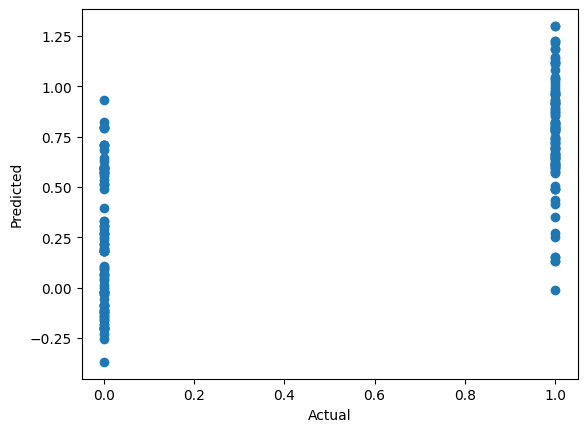

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
 # using  KNN Algorithm #

from sklearn.neighbors import KNeighborsRegressor
knn_sklearn=KNeighborsRegressor()
knn_sklearn.fit(X_train,y_train)
y_pred=knn_sklearn.predict(X_test)

In [ ]:
# Model Evaluation #

from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squad Error:",mse)
print("R-squared:",r2)

Mean Squad Error: 0.1648780487804878
R-squared: 0.3403465346534654


<function matplotlib.pyplot.show(close=None, block=None)>

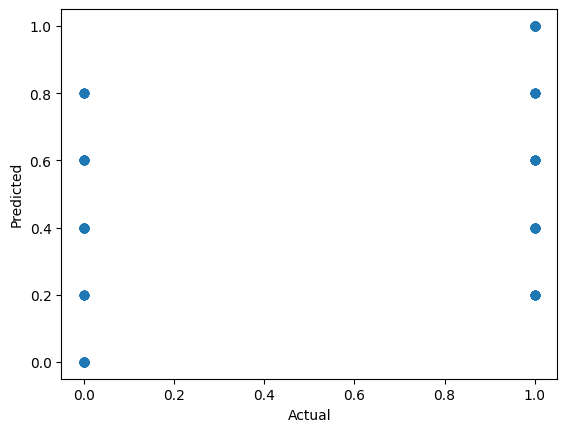

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show

In [ ]:
# Naive Bayes  #

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Features and label

X = data.drop("target", axis=1)
y = data["target"]

In [ ]:
# Train-test split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:

# Create and train Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predictions

y_pred = model.predict(X_test)

In [ ]:
# Accuracy


print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8292682926829268
